In [ ]:
"""
To cleanly write the limb split method 
once you have the graph where you want to split it

"""

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")

In [2]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du
du = reload(du)

INFO - 2020-12-04 17:20:18,379 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-12-04 17:20:18,380 - settings - Setting database.user to celiib
INFO - 2020-12-04 17:20:18,381 - settings - Setting database.password to newceliipass
INFO - 2020-12-04 17:20:18,433 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-12-04 17:20:18,433 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-04 17:20:18,448 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-12-04 17:20:18,714 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-04 17:20:18,732 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-12-04 17:20:18,733 - settings - Setting database.user to celiib
INFO - 2020-12-04 17:20:18,734 - settings - Setting database.password to newceliipass
INFO - 2020-12-04 17:20:18,737 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-04 17:20:18,941 - settings - Setting enable_python_native_blobs to True


In [3]:
import neuron_visualizations as nviz
minnie,schema = du.configure_minnie_vm()

INFO - 2020-12-04 17:20:27,607 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-04 17:20:27,824 - settings - Setting enable_python_native_blobs to True


In [6]:
minnie.Decomposition() & "n_somas=2"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134746438500,0,0.25,=BLOB=,96262,196408,2,2,1,2,3,17,10,93036.63556649437,64481.87907948077,2349.736,400.076,400.076,1813.267,1806.613,12,0.00012898144829649884,0.7058823529411765,74145.953,10,nan,nan,385590204.4680214,17763948.123847008,4144.498585102377,5200.421450757015,38559020.44680214,212.5325
864691134873995002,0,0.25,=BLOB=,61102,123190,2,2,1,2,6,37,18,340176.25705898437,121760.54108850352,7051.914,95.707,95.707,204.908,204.908,11,3.233617800107863e-05,0.2972972972972973,97702.391,5,nan,nan,532579888.4166296,18932158.883336384,1565.5998246940665,5451.042527880711,106515977.68332592,103.5239
864691134875730426,0,0.25,=BLOB=,32400,65738,2,1,1,2,4,20,7,211907.79612194866,79543.62061901993,7115.249,115.882,115.882,232.072,232.072,3,1.4157100658408814e-05,0.15,82827.46,4,nan,nan,186180470.5000229,73117959.2333374,878.5918871662456,2247.810937339173,46545117.62500572,77.5671
864691134884780538,0,0.25,=BLOB=,368083,762245,3,3,1,2,9,179,93,2730823.88507292,1300564.5666538128,9463.896,312.119,283.262,567.232,561.396,1267,0.0004639625451225932,7.078212290502793,2091543.556,118,nan,nan,78258654703.78412,36561888.533317566,28657.52534667552,37416.69853314024,663208938.167662,1482.0695
864691134884781562,0,0.25,=BLOB=,622060,1284691,2,0,2,2,8,281,171,6276147.438207486,3194514.227623636,9691.002,114.686,114.686,548.598,494.387,1945,0.00030990349081976096,6.92170818505338,3814066.067,117,nan,nan,127318953913.38474,29815131.054992676,20286.16363253378,33381.42330962007,1088196187.2938867,2265.187
864691134884782074,0,0.25,=BLOB=,666150,1371797,2,1,2,2,8,295,67,7076400.532688094,1887566.3249400053,10495.549,95.42,95.42,441.437,402.293,1803,0.00025479055229722826,6.111864406779661,3984280.097,94,nan,nan,104216248653.80307,34374210.809147514,14727.296479671524,26156.85798101234,1108683496.317054,4684.057
864691134917398026,0,0.25,=BLOB=,712916,1432520,2,2,1,2,14,356,148,8100892.001324374,3704685.194322776,10322.443,136.53,136.53,367.317,341.525,1817,0.00022429628733514133,5.103932584269663,4063164.721,119,nan,nan,104738435237.1656,34811720.200001396,12929.24720142454,25777.55085730023,880154917.9593748,3799.4597
864691134936759620,0,0.25,=BLOB=,14945,30358,1,0,1,2,1,5,5,18036.709033881598,18036.709033

In [10]:
segment_id = 864691134947442940

In [11]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=segment_id)).fetch1("decomposition")
# ret_col = nviz.visualize_neuron(neuron_obj,
#                      visualize_type=["mesh","skeleton"],
#                      limb_branch_dict=dict(L0="all"),
#                      return_color_dict=True)

Decompressing Neuron in minimal output mode...please wait


In [12]:
ret_col = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


# Getting the branchs that are errors

In [16]:
import neuron_utils as nru
nru.multi_soma_touching_limbs(neuron_obj)

array([0])

In [67]:
ret_col_0 = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


No limb name was given so using L0 because was the limb in the first key


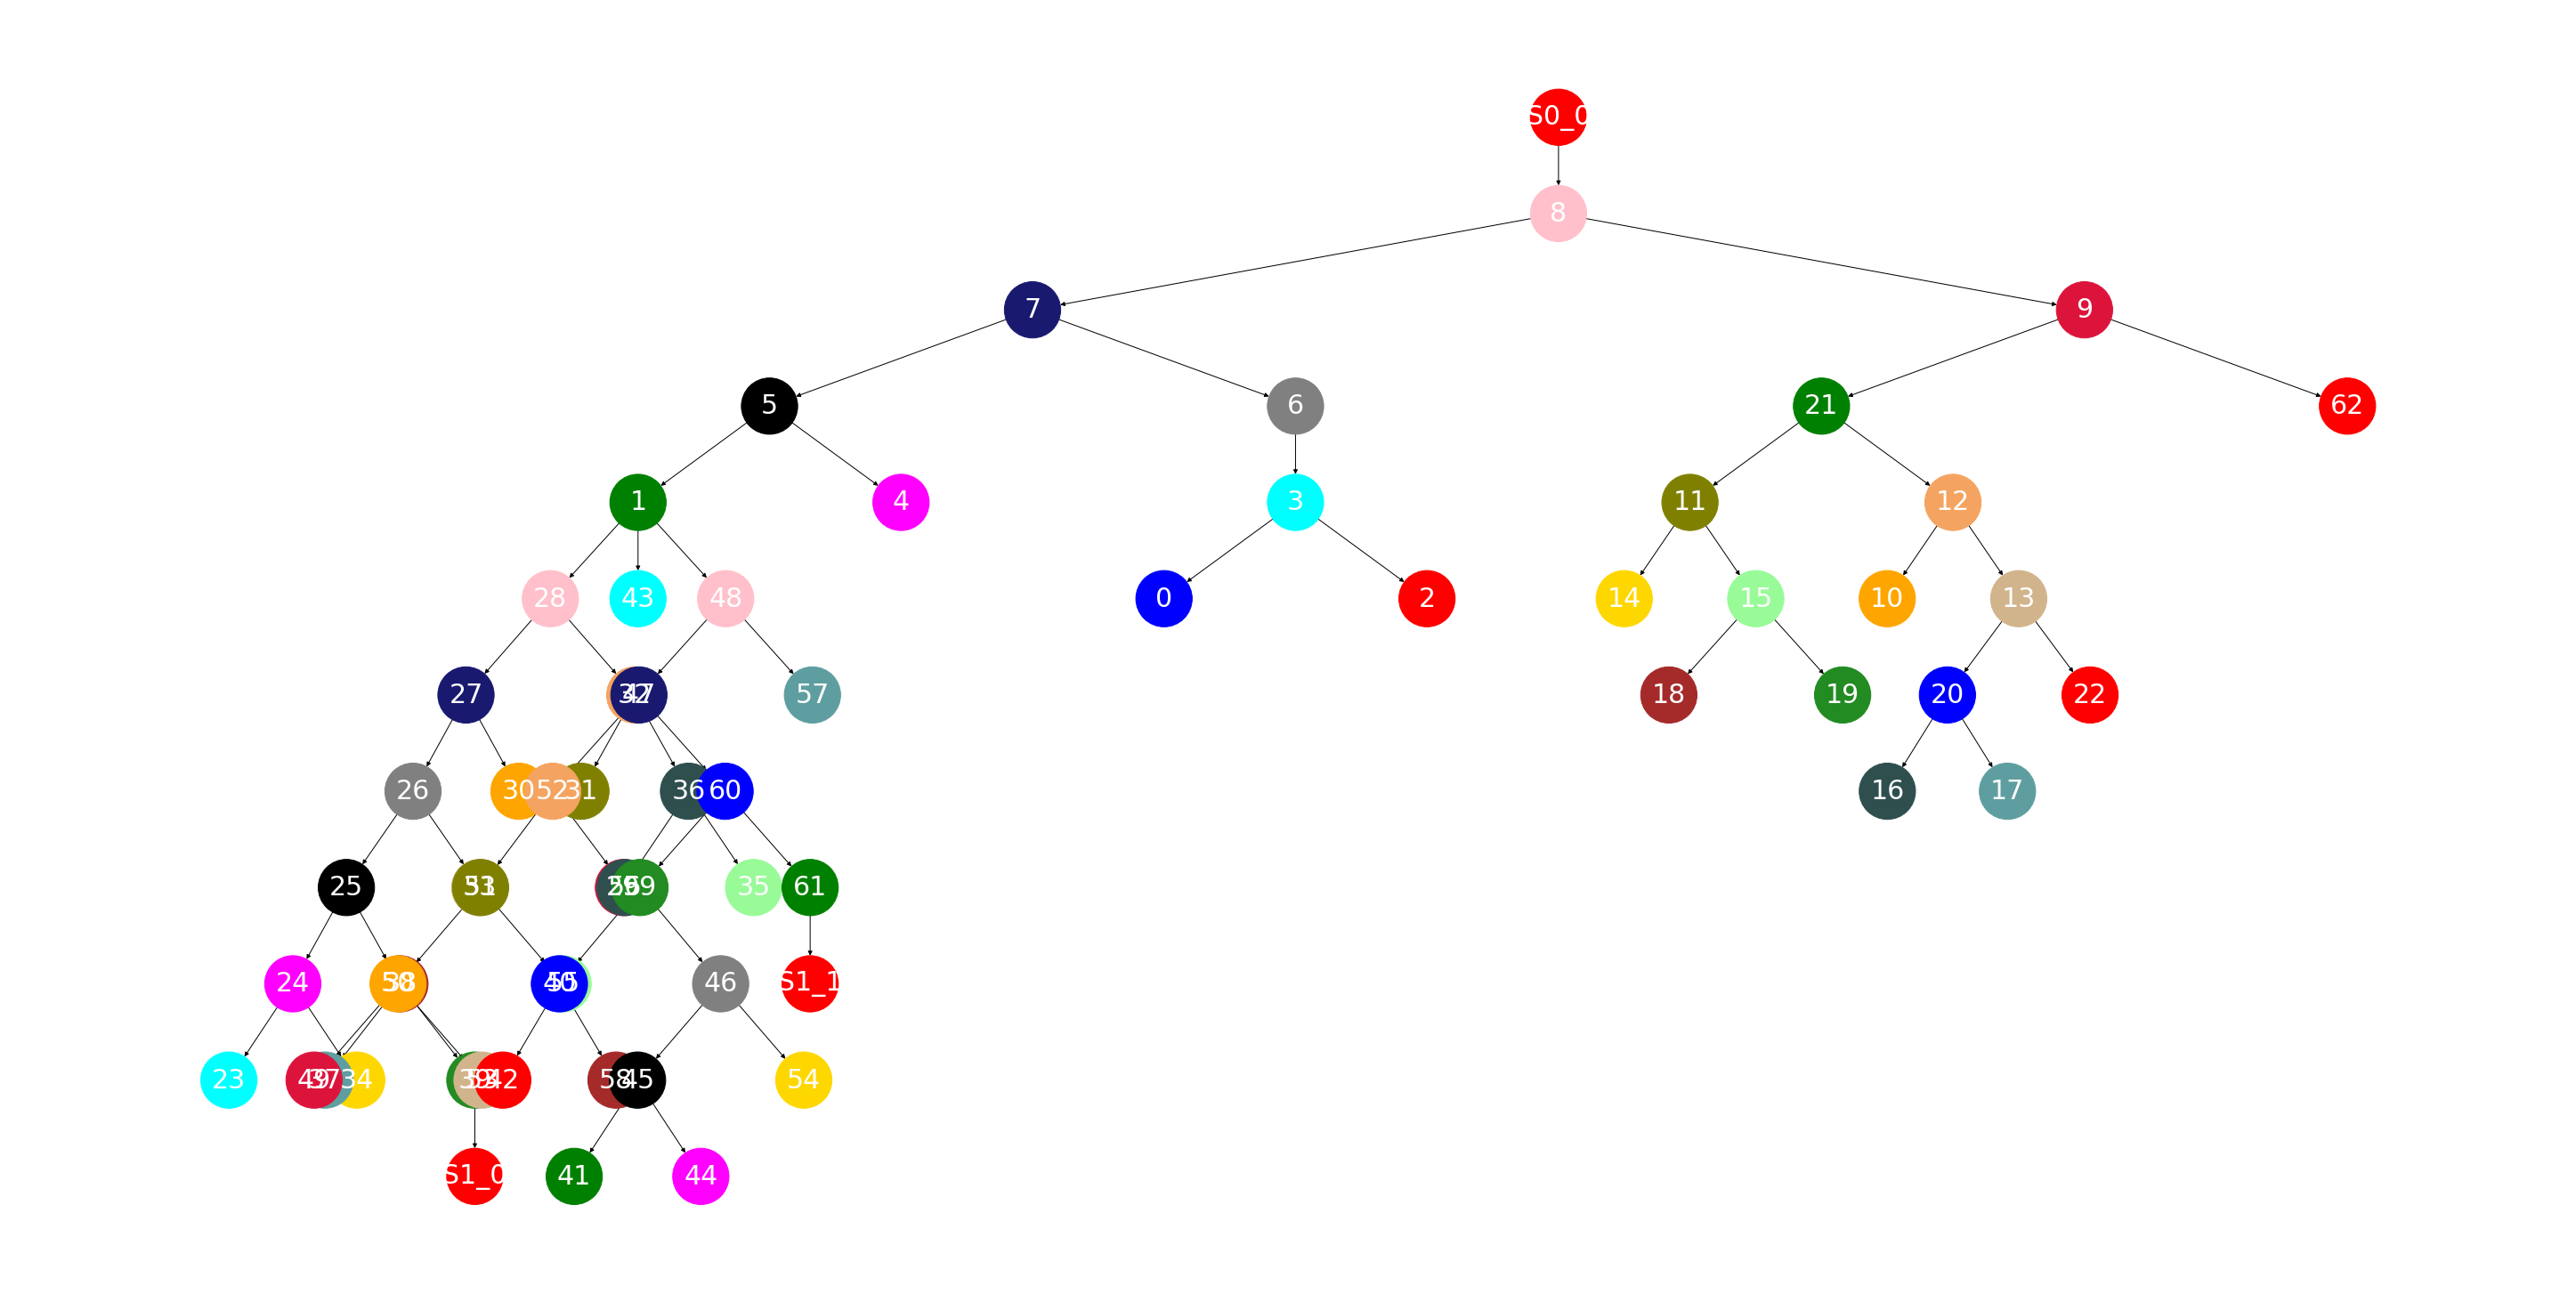

In [68]:
nviz.plot_limb_concept_network_2D(neuron_obj,node_colors=ret_col_0,node_size=4000)

In [ ]:
[8, 39, 61]

In [17]:
nru.same_soma_multi_touching_limbs(neuron_obj)

array([0, 2])

In [69]:
ret_col_2 = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L2="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


No limb name was given so using L2 because was the limb in the first key


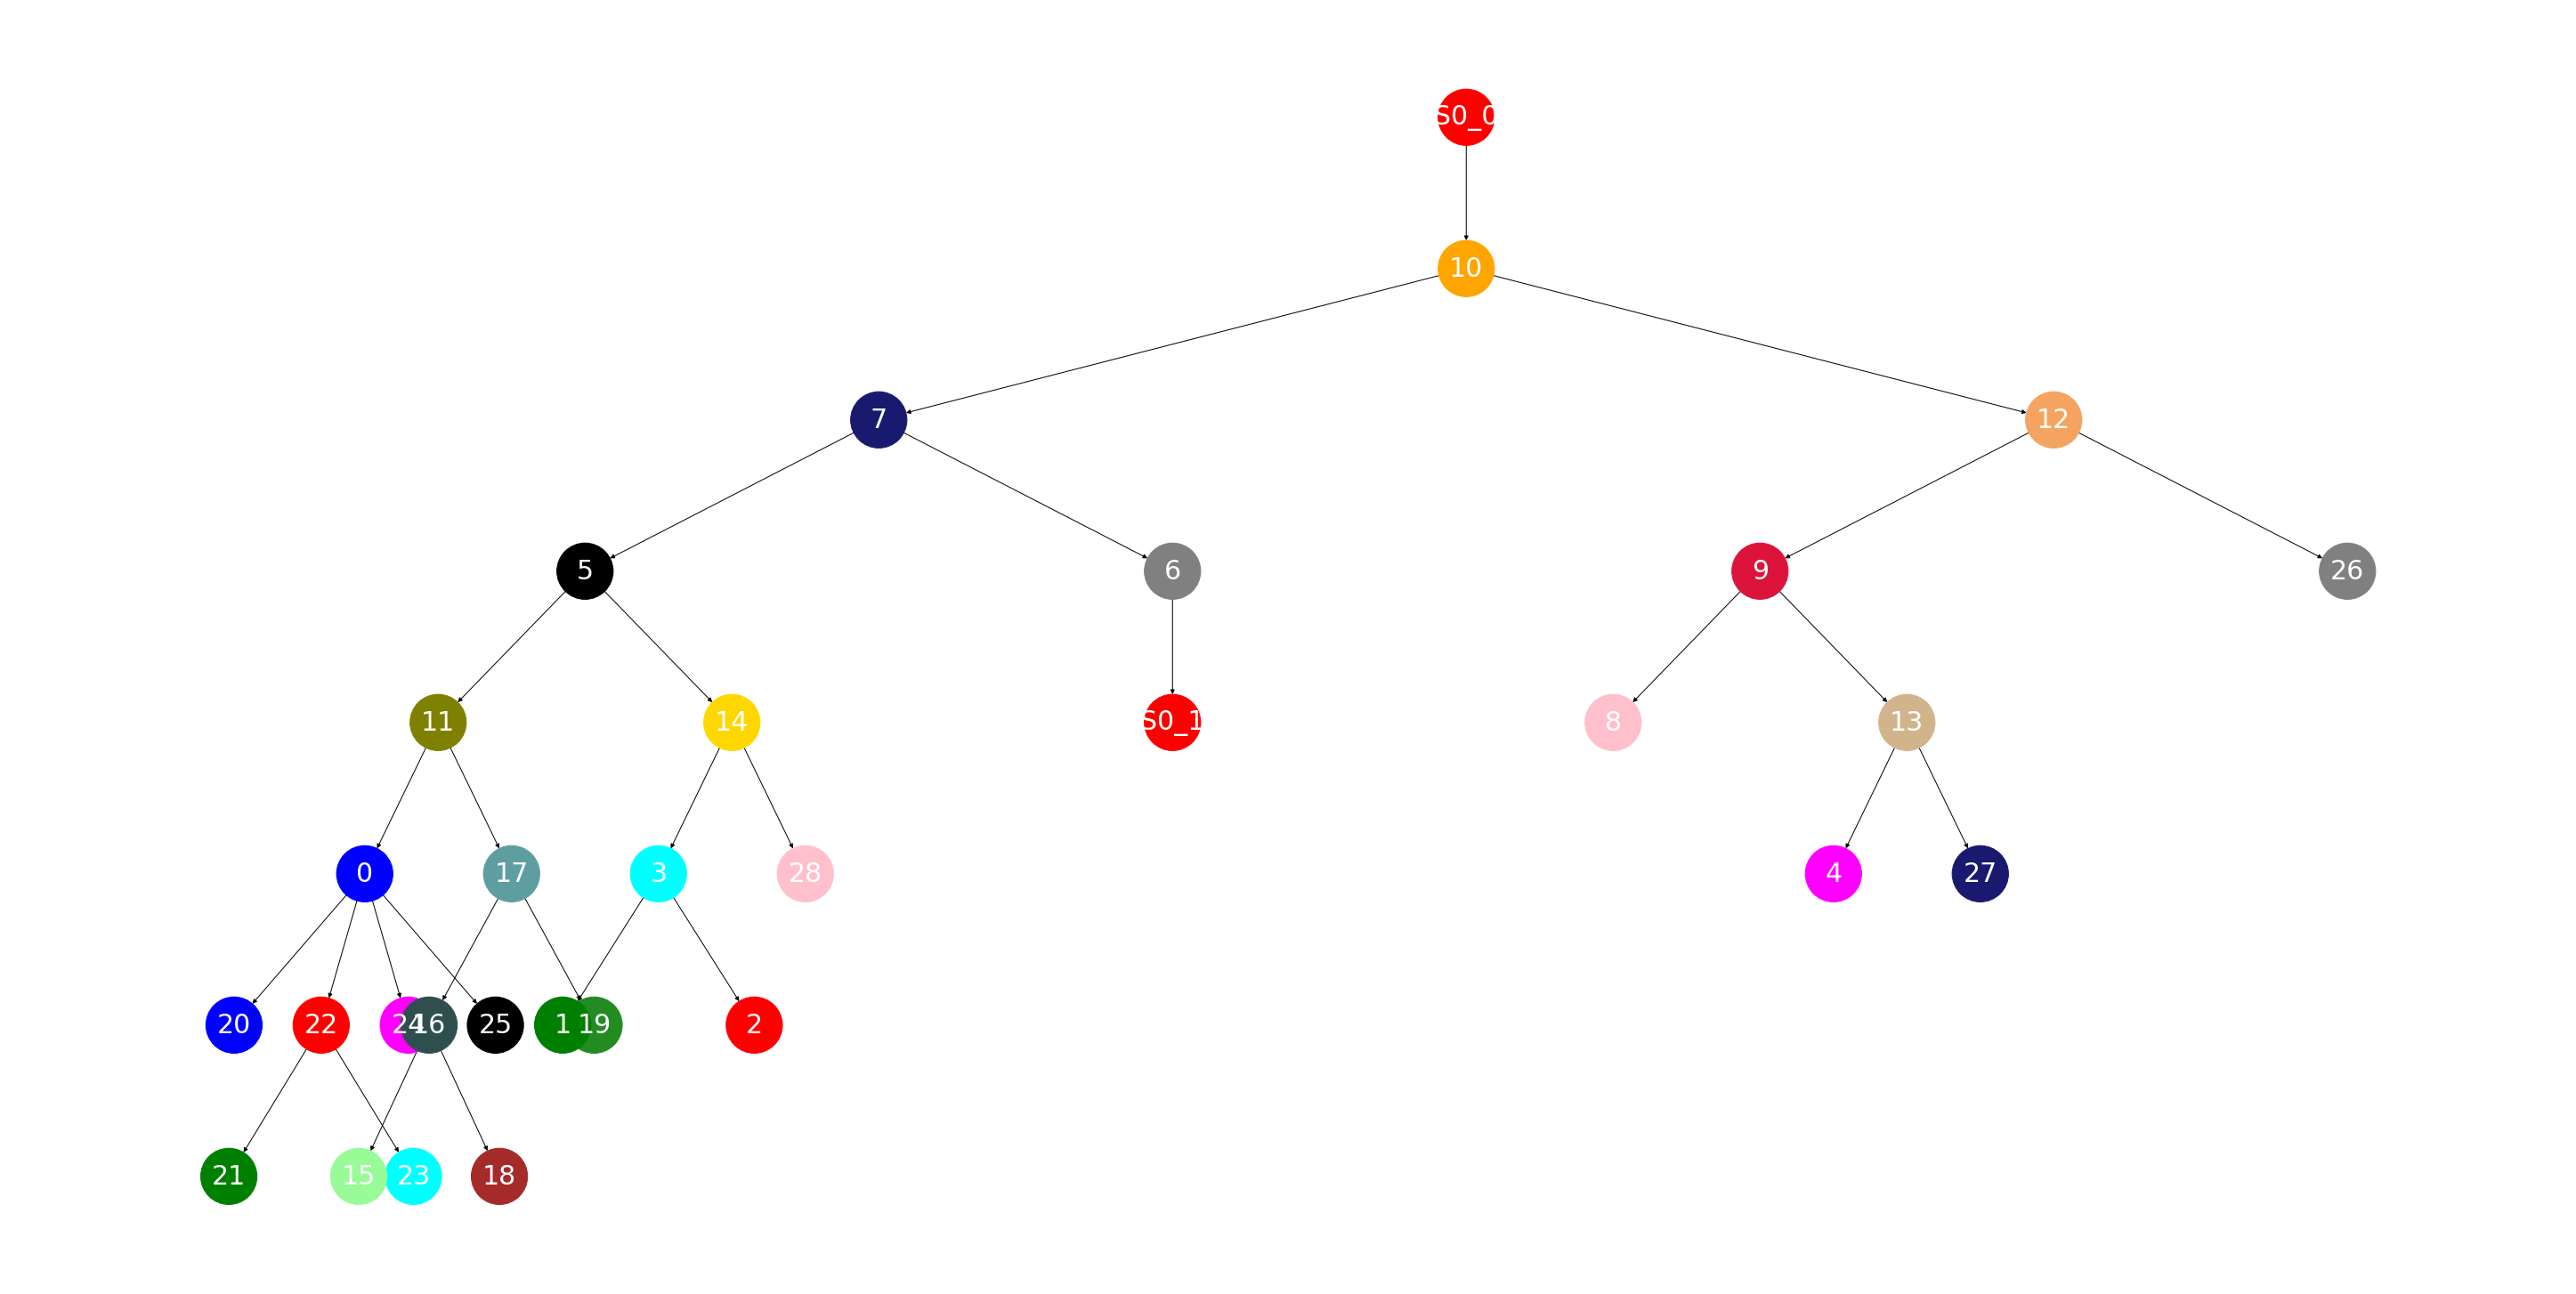

In [70]:
nviz.plot_limb_concept_network_2D(neuron_obj,node_colors=ret_col_2,node_size=4000)

# Getting to the seperate graphs

In [33]:
"""
Find path to cut:
1) Get the concept network
2) Get all of the starting nodes for somas
3) Get the shortest path between each combination of starting nodes

"""
def get_best_cut_edge(curr_limb_graph,cut_path):
    return cut_path[[0,1]]
    #return [18,17]


import itertools
import networkx as nx
import copy
import numpy as np

verbose = True

curr_limb_idx = 0
curr_limb = neuron_obj[curr_limb_idx]
curr_limb_graph = copy.deepcopy(curr_limb.concept_network)

#2) Get all of the starting nodes for somas
all_starting_nodes = [k["starting_node"] for k in curr_limb.all_concept_network_data]

starting_node_combinations = list(itertools.combinations(all_starting_nodes,2))

total_soma_paths_to_cut = []
for st_n_1,st_n_2 in starting_node_combinations:
    # need to keep cutting until no path for them
    if verbose:
        print(f"---- working on disconnecting {st_n_1} and {st_n_2}")
        
    counter = 0
    while True:
        if verbose:
            print(f" Cut iteration {counter}")
        try:
            
            soma_to_soma_path = np.array(nx.shortest_path(curr_limb_graph,st_n_1,st_n_2))
        except:
            print("No valid path so just skipping ")
            break

        if verbose:
            print(f"Shortest path = {soma_to_soma_path}")

        # say we found the cut node to make
        cut_edge = get_best_cut_edge(curr_limb_graph,soma_to_soma_path)
        total_soma_paths_to_cut.append(soma_to_soma_path)
        curr_limb_graph.remove_edge(*cut_edge)
        
        counter += 1


seperated_graphs = list(nx.connected_components(curr_limb_graph))
print(f"Total number of graphs at the end of the split = {len(seperated_graphs)}")



---- working on disconnecting 8 and 39
 Cut iteration 0
Shortest path = [ 8  7  5  1 28 27 26 25 38 39]
in remove edge
 Cut iteration 1
No valid path so just skipping 
---- working on disconnecting 8 and 61
 Cut iteration 0
No valid path so just skipping 
---- working on disconnecting 39 and 61
 Cut iteration 0
Shortest path = [39 38 25 26 27 28  1 48 47 60 61]
in remove edge
 Cut iteration 1
No valid path so just skipping 
Total number of graphs at the end of the split = 3


In [35]:
curr_path_to_cut = total_soma_paths_to_cut[0]
curr_path_to_cut

array([ 8,  7,  5,  1, 28, 27, 26, 25, 38, 39])

# How to aply the algorithms

In [53]:
#Width Algorithm
import error_detection as ed  
ed = reload(ed)

curr_limb_idx = 0

error_edges = ed.width_jump_edges(limb=neuron_obj[curr_limb_idx],
    width_jump_threshold = 200,
    verbose = False,
    path_to_check = curr_path_to_cut
    )


No skeletons to stack so returning empty list



In [54]:
error_edges

{0: {0: []}, 1: {0: [[7, 8], [27, 28], [39, 38]], 1: [[7, 8]]}}

In [55]:
import numpy as np
curr_soma_idx = 0
curr_group_idx = 0

total_error_dges = []
for sm_idx,sm_group_data in error_edges.items():
    for sm_group_idx,e_e in sm_group_data.items():
        if len(e_e) > 0:
            total_error_dges.append(np.concatenate(e_e))
            
curr_errors = np.unique(np.concatenate(total_error_dges))
curr_errors
#curr_errors = np.array(error_edges[curr_soma_idx][curr_group_idx]).ravel() #visualizing culprit and causing



array([ 7,  8, 27, 28, 38, 39])

In [56]:
highlight_color = [1,0,0,1]
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton","network"],
                     limb_branch_dict=dict(L0="all"),
                      mesh_color={f"L{curr_limb_idx}":dict([(k,highlight_color) for k in curr_errors])},
                      #mesh_color = "green",
                      mesh_fill_color="green",
                      skeleton_color="green",
                      skeleton_fill_color="green",
                      
                      
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton

 Working on visualization type: network
Working on  new stand alone scatter points


# Applying Doubling Back Algorithm

In [62]:
#doubling back algorithm
import error_detection as ed  
ed = reload(ed)

error_edges_double_back = ed.double_back_edges(limb=neuron_obj[0],
    double_back_threshold = 100,
                  comparison_distance=3000,                     
                    verbose = False,
                    path_to_check = curr_path_to_cut)

In [63]:
error_edges_double_back

{0: {0: []}, 1: {0: [], 1: []}}

In [65]:
total_error_edges_db = []
for sm_idx,sm_group_data in error_edges_double_back.items():
    for sm_group_idx,e_e in sm_group_data.items():
        if len(e_e) > 0:
            total_error_edges_db.append(np.concatenate(e_e))

if len(total_error_edges_db)>0:
    curr_errors_db = np.unique(np.concatenate(total_error_edges_db))
else:
    print("No error edges detected")
    curr_errors_db = []

curr_errors_db

No error edges detected


[]

In [66]:
highlight_color = [1,0,0,1]
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton","network"],
                     limb_branch_dict=dict(L0="all"),
                      mesh_color={f"L{curr_limb_idx}":dict([(k,highlight_color) for k in curr_errors_db])},
                      #mesh_color = "green",
                      mesh_fill_color="green",
                      skeleton_color="green",
                      skeleton_fill_color="green",
                      
                      
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton

 Working on visualization type: network
Working on  new stand alone scatter points


# Finding the limbs that are error limbs

# Seeing the Degrees of the Soma to Soma Path

In [ ]:
xu.get_node_degree(neuron_obj[0].concept_network,node_name=soma_to_soma_path)

# Function which will split neuron object

In [ ]:
import numpy as np
import preprocessing_vp2 as pre
import networkx_utils as xu
import trimesh_utils as tu

In [ ]:
import error_detection as ed
ed = reload(ed)

In [ ]:
revised_neuron = ed.split_neuron_limb(neuron_obj,
                     seperated_graphs,
                     curr_limb_idx,
                     verbose = False)

In [ ]:
nviz.visualize_neuron(revised_neuron,
                     visualize_type=["mesh","skeleton"],
                      limb_branch_dict="all",
                     mesh_resolution="limb",
                     skeleton_resolution="limb")

In [ ]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [ ]:
nviz.plot_soma_limb_concept_network(revised_neuron)